# Movie Recommendation Engine

### Data-Set used for this project: TMDB 5000 Movie Data-Set

Delving into some types of filtering

<i> 1) Demographic Filtering</i>- 
It employs demographic data (e.g., age, profession) to infer recommendation rules based on stereotypes.

<i> 2) Content Based Filtering</i>-
Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.

<i> 3) Collaborative Filtering</i>-
Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user.

## steps to build this project
 ### Data collection
 
 Data collection is the process of gathering and measuring information on targeted variables in an established system, which then enables one to answer relevant questions and evaluate outcomes.
Here we use the TMDB 5000 Movie Data-Set.

##### Three CSV files used here are
1) tmdb_5000_credits.csv

2) tmdb_5000_movies.csv

3) ratings_small.csv

  ### Data preparation
  
  Data preparation is the act of manipulating (or pre-processing) raw data (which may come from disparate data sources) into a form that can readily and accurately be analysed.
It includes many discrete tasks such as loading data or data ingestion, data fusion, data cleansing, data augmentation, data wrangling etc.

 #### Data Ingestion
 Data ingestion is the process of obtaining and importing data for immediate use or storage in a database.
 
 #### Data Fusion
 
 Data fusion is the process of integrating multiple data sources to produce more consistent, accurate, and useful information than that provided by any individual data source.
 
 #### Data Cleansing
 
 Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.
 
 #### Data Augmentation
 
 Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.
 
 #### Data wrangling
 
 Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes.
 
 ## Data preparation for the project
 
 In this entire document the following abbrevations are used:

- pandas : pd
- numpy : np
- matplotlib.pyplot : plt
- plotly.graph_objects : go
- plotly.express : px
- seaborn : sns

In [1]:
import pandas as pd 
import numpy as np 
tmdb_Credits=pd.read_csv(r'D:\Movie_recommendation_engine\tmdb_5000_credits.csv')
tmdb_Movies=pd.read_csv(r'D:\Movie_recommendation_engine\tmdb_5000_movies.csv')

##### Features of the data-set-tmdb_5000_credits:

- movie_id - A unique identifier for each movie.
- cast - The name of lead and supporting actors.
- crew - The name of Director, Editor, Composer, Writer etc.

##### Features of the data-set-tmdb_5000_movies:

- budget - The budget in which the movie was made.
- genre - The genre of the movie, Action, Comedy ,Thriller etc.
- homepage - A link to the homepage of the movie.
- id - This is infact the movie_id as in the first dataset.
- keywords - The keywords or tags related to the movie.
- original_language - The language in which the movie was made.
- original_title - The title of the movie before translation or adaptation.
- overview - A brief description of the movie.
- popularity - A numeric quantity specifying the movie popularity.
- production_companies - The production house of the movie.
- production_countries - The country in which it was produced.
- release_date - The date on which it was released.
- revenue - The worldwide revenue generated by the movie.
- runtime - The running time of the movie in minutes.
- status - "Released" or "Rumored".
- tagline - Movie's tagline.
- title - Title of the movie.
- vote_average - average ratings the movie recieved.
- vote_count - the count of votes recieved.




#### Join the two data-sets on the column 'id'

In [2]:
#change movie_id to id
tmdb_Credits.columns = ['id','tittle','cast','crew']
#merging the 2 datasets
tmdb_Movies= tmdb_Movies.merge(tmdb_Credits,on='id')


### Demographic Filtering

We need to rate the movie based on some condition or crieria.Recommendation for the user will be based on this.
We can use IMBD'S Weighted Rating(W) formula.

The formula for calculating the Top Rated 250 Titles gives a true Bayesian estimate:

weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C where:

R = average for the movie (mean) = (Rating)

v = number of votes for the movie = (votes)

m = minimum votes required to be listed in the Top 250 (currently 25000)

C = the mean vote across the whole report 
vote_count(v) feature and vote_average(R) feature is already present. We need to calculate C and m.
For calculating value of m we can set 90 percentile as the cutoff. A movie must have more votes than at least 90% of the movies.



In [3]:
C= tmdb_Movies['vote_average'].mean()
C



6.092171559442011

In [4]:
m= tmdb_Movies['vote_count'].quantile(0.9)
m



1838.4000000000015

### Creating a dataframe with the filtered movies


In [5]:

q_movies = tmdb_Movies.copy().loc[tmdb_Movies['vote_count'] >= m]

#### The number of movies which got qualified

In [6]:
q_movies.shape


(481, 23)

#### Function to calculate the weighted rating of each movie

In [7]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

#### A new feature 'score' is added,which is calculated by applying the above function on the qualified movies

In [8]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

#### DataFrame being sorted according to the feature-'score'


In [9]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#### Exploratory Data analysis


Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

- Data Visualization
It involves the creation and study of the visual representation of data.To communicate information clearly and efficiently, data visualization uses statistical graphics, plots, information graphics and other tools. Numerical data may be encoded using dots, lines, bars etc., to visually communicate a quantitative message.
##### Different types of graph used for visualization

##### Bar Graph
A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### Line Graph
A line graph reveals trends or progress over time and can be used to show many different categories of data.

##### Scatter Plot Chart
A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.

##### Histogram
A histogram is an accurate representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable

##### Box plot
Boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles

##### Pie chart
A pie chart is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice, is proportional to the quantity it represents.

##### Heat map
A heat map (or heatmap) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

### Movies are sorted according to their popularity


In [10]:
# Sorting in Descending Order
popularity= tmdb_Movies.sort_values('popularity', ascending=False)

### Plotting a bar graph to depict the popularity of movies

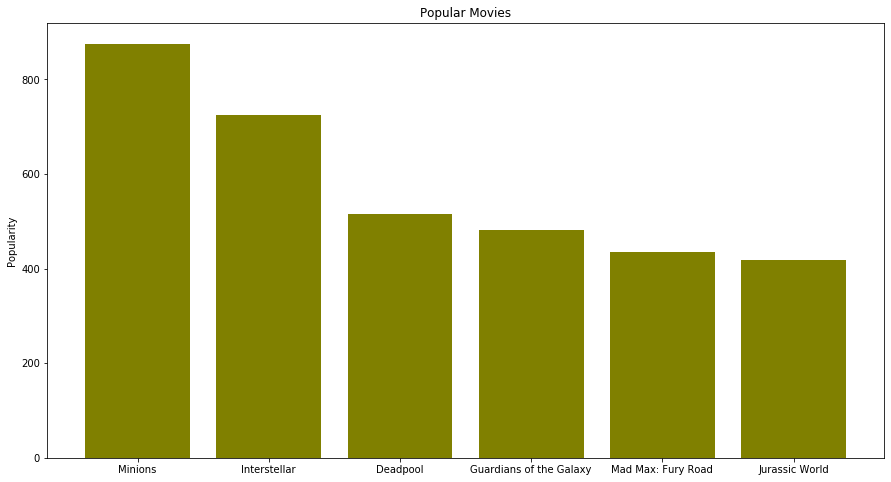

In [11]:
#Plot a bar graph with 'title' and 'popularity'
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

plt.bar(popularity['title'].head(6),popularity['popularity'].head(6), align='center',
        color='olive')
plt.ylabel("Popularity")
plt.title("Popular Movies")
plt.show()


### Content based Filtering


The features of the movie are used to find the similarity between the movies.Based on the similarity, movies are recommended.

### Computation of Similarity

#### Correlation

It refers to a mutual relationship or association between quantities.Correlation is the first step to understanding these relationships and subsequently building better business and statistical models.

#### Types of correlation

##### Pearson correlation coefficient
It's a measure of the linear correlation between two variables X and Y. According to the Cauchy–Schwarz inequality it has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

##### Spearman's rank correlation coefficient
It's a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function.


### Heat Map showing the correlation between the features


[Text(0.5, 0, 'budget'),
 Text(1.5, 0, 'id'),
 Text(2.5, 0, 'popularity'),
 Text(3.5, 0, 'revenue'),
 Text(4.5, 0, 'runtime'),
 Text(5.5, 0, 'vote_average'),
 Text(6.5, 0, 'vote_count')]

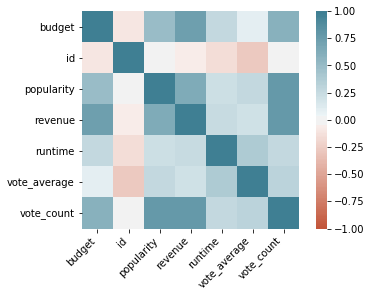

In [12]:

import seaborn as sns
corr = tmdb_Movies.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)



### Cosine similarity

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. The cosine of two non-zero vectors can be derived by using the Euclidean dot product formula:


### Similarity based on the 3 top actors, the director, related genres and the movie plot keywords.

#### Conversion of string type features to objects:


In [13]:

# Parse the stringified features into their corresponding python objects
from ast import literal_eval  

features = ['cast', 'crew', 'keywords', 'genres','production_companies']
for feature in features:
    tmdb_Movies[feature] = tmdb_Movies[feature].apply(literal_eval)

### Functions to extract required features


In [14]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan


#### Get the name of the Production Company


In [15]:
def get_pclist(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        return names
    

#### Return the list of top three actors

In [16]:

def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

#### Define the new features:

In [17]:
tmdb_Movies['director'] = tmdb_Movies['crew'].apply(get_director)
tmdb_Movies['production_companies']=tmdb_Movies['production_companies'].apply(get_pclist)
features = ['cast', 'keywords', 'genres']
for feature in features:
    tmdb_Movies[feature] = tmdb_Movies[feature].apply(get_list)
    

### Data cleaning
Convert the names and keyword instances into lowercase and strip all the spaces between them.

#### Function for cleaning



In [18]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''
        

#### Apply the cleaning function to the required features.


In [19]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres','production_companies']

for feature in features:
    tmdb_Movies[feature] = tmdb_Movies[feature].apply(clean_data)
    

### Metadata

Metadata is "data information that provides information about other data". Many distinct types of metadata exist, among these descriptive metadata, structural metadata, administrative metadata, reference metadata and statistical metadata.

#### Metadata Creation:


In [20]:
def create_Metadata(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director']+' ' + x['director']+ ' ' + ' '.join(x['genres'])+' ' + ' '.join(x['production_companies'])
tmdb_Movies['metadata'] = tmdb_Movies.apply(create_Metadata, axis=1)

### Feature Extraction

Feature extraction starts from an initial set of measured data and builds derived values (features) intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. Feature extraction is related to dimensionality reduction.

The sklearn.feature_extraction module can be used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image.


In [21]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(tmdb_Movies['metadata'])

### Computing Similarity

##### Cosine similarity is used



In [22]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

### Define a recommendation function

Input: Movie Title
Output: 10 most similar movies


### Reverse Mapping of Movie titles and Dataframe indices
This is required to identify the index of a movie when its title is given.



In [23]:
indices = pd.Series(tmdb_Movies.index, index=tmdb_Movies['title']).drop_duplicates()



### Function Definition:


In [24]:

def get_recommendations(title, cosine_sim=cosine_sim2):
    # Get the index using indices(Defined above)
    idx = indices[title]

    # Calculate the cosine similarity score
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores 
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # The 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the 'title'of the top 10 most similar movies
    return tmdb_Movies['title'].iloc[movie_indices]

### Function call

By calling the function we get names of 10 similar movies.

In [25]:
get_recommendations('Guardians of the Galaxy',cosine_sim2)

7          Avengers: Age of Ultron
79                      Iron Man 2
182                        Ant-Man
2509                       Slither
16                    The Avengers
4033                         Super
174            The Incredible Hulk
4401           The Helix... Loaded
26      Captain America: Civil War
31                      Iron Man 3
Name: title, dtype: object

### Collaborative Filtering

- User-based collaborative filtering In User-based filtering the system calculates similarity between pairs of users.Recommendation of movies to a user is based on what similar users have liked.

- Item Based Collaborative FilteringItem- is a form of collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings of those items. The system executes a model-building stage by finding the similarity between all pairs of items. This similarity function can take many forms, such as correlation between ratings or cosine of those rating vectors. It uses the most similar items to a user's already-rated items to generate a list of recommendations.

### Problems of Collaborative Filtering Model

- Scale
- Sparse Data
- Cold start
- Popularity Bias

 #### Algorithm Selection
- Categorize the problem:Categorize by the input or Categorize by output
- Understand the Data: Analyse,Process and Transform data.
- Idenftify available algorithms:Identify the algorithms that are applicable and practical to implement in a reasonable time.
- Implement Machine Learning Algorithm:Set up a machine learning pipeline that compares the performance of each algorithm.
- Optimize hyperparameters:Three options for optimizing hyperparameters, grid search, random search, and Bayesian optimization.
- Feature engineering: Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work.This step involves the art and science of transforming raw data into features that better represent a pattern to the learning algorithms.
### Model Preparation: 
To prepare data for builidng efficient models that provide high accuracy.
### Splitting data into training and evaluation sets:
Split the data into two sets, one for training the algorithm, and another for evaluation purposes. Non-overlapping subsets of the data must be selected for the training and evaluation sets in order to ensure proper testing.
- Training dataset: A training dataset is a dataset of examples used for learning, that is to fit the parameters.
- Test dataset: A test dataset is a dataset that is independent of the training dataset, but that follows the same probability distribution as the training dataset.A test set is therefore a set of examples used only to assess the performance.

 ### Machine Learning Model
The term ML model refers to the model artifact that is created by the training process.The ML model is used for getting predictions on new data for which the target is not known.

 ### Model Selection Criteria
- Accuracy
- Interpretability
- Complexity
- Scalability
- Time to build, train, and test
- Time make predictions
- Business goal achievement
### Latent Factor Model
It describes a property or concept that a user or an item have.It can handle the scalability and sparsity issue created by collaborative filtering system.

### Single Value Decomposition
SVD is a Matrix Factorization techniques are usually more effective because they allow us to discover the latent features underlying the interactions between users and items.
Singular value decomposition takes a rectangular matrix of gene expression data (defined as A, where A is a n x p matrix) in which the n rows represents the genes, and the p columns represents the experimental conditions. The SVD theorem states:

 ##### Anxp= Unxn Snxp VTpxp



#### We will load a new data set which has the feature 'userid' which will be required for this model.




In [63]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()
ratings = pd.read_csv(r'D:\Movie_recommendation_engine\ratings_small.csv')
#The new data:
ratings.head()





,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [64]:
svd = SVD()

In [65]:
cross_validate(svd, data, measures=['RMSE', 'MAE'])


{'test_rmse': array([0.88991962, 0.90602426, 0.89184102, 0.9006499 , 0.89909667]),
 'test_mae': array([0.68638904, 0.69410266, 0.68669526, 0.69282434, 0.69411183]),
 'fit_time': (7.7224414348602295,
  7.943454265594482,
  7.797446012496948,
  7.780445098876953,
  7.619435787200928),
 'test_time': (0.2630150318145752,
  0.3850221633911133,
  0.250014066696167,
  0.3430194854736328,
  0.24801421165466309)}

### Dataset Training

In [67]:
trainset = data.build_full_trainset()
svd.fit(trainset)

### Model Validation

Model validation is referred to as the process where a trained model is evaluated with a testing data set.

### Prediction

In [69]:
svd.predict(1, 32, 3)

Prediction(uid=1, iid=32, r_ui=3, est=2.925871592634195, details={'was_impossible': False})

### For user 1, the prediction value=2.92, for the movie with id=32

In [71]:
svd.predict(2,32,3)

Prediction(uid=2, iid=32, r_ui=3, est=3.704445884866218, details={'was_impossible': False})

### For user 2, the prediction value=3.70, for the movie with id=32

### Some Data Visualization for better analysis of the data 

In [72]:
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go


### Below is a KDE plot depicting Average Vote Count of users for each movie

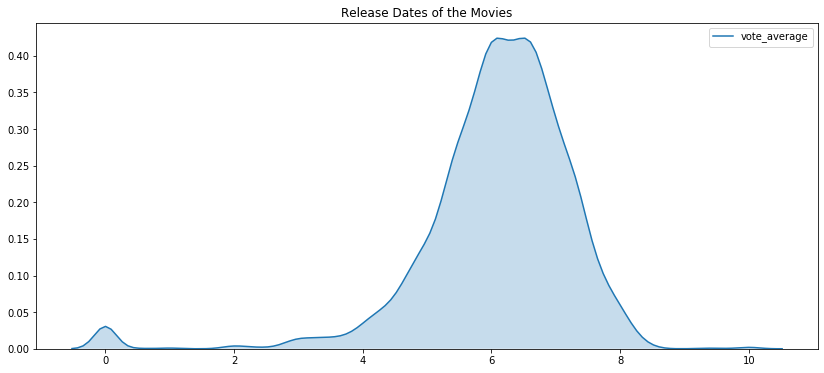

In [74]:
plt.figure(figsize=(14,6))
plt.title("Release Dates of the Movies")
sns.kdeplot(data=tmdb_Movies.vote_average,shade=True)

#### Below is a plot showing revenue of top 10 movies grouped according to director. Popularity of the movie can be seen upon hovering.

In [76]:
sorted_Rev=tmdb_Movies.sort_values('revenue',ascending=False)
top_Rev=sorted_Rev.head(10)
fig = px.bar(top_Rev, x="title", y="revenue",color='director',orientation='v',
             hover_data=["popularity"],
             height=500,
             title='')
fig.show()

### The bar plot below show movies with maximum budget in the data set (top 10)


In [77]:
sorted_Budg=tmdb_Movies.sort_values('budget',ascending=False)
top_Budg=sorted_Budg.head(10)
top_Budg=top_Budg.sort_values('budget',ascending=True)
fig = go.Figure(go.Bar(
            x=top_Budg['budget'],
            y=top_Budg['title'],
            orientation='h',marker=dict(
        color='Brown', #Bar Color
        )))
fig.update_layout(
    
    title=go.layout.Title(
        text="Top Budget Movies",
        xref="paper",
        x=0),

    barmode='group',
    paper_bgcolor='White',
    plot_bgcolor='White',
    margin=dict(l=100, r=20, t=140, b=90),
    showlegend=False,
)
fig.show()

## Histogram depicting the distribution of 'Vote Average' data:


In [78]:
fig = px.histogram(tmdb_Movies, x="vote_average",nbins=40)
fig.show()